In [918]:
# If you need to install anything just uncomment and run this cell
# !pip install pandas
# !pip install string
# !pip install numpy
# !pip install matplotlib
# !pip install datascience

In [1]:
import pandas as pd
from string import punctuation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
from datascience import *

# Introduction

Before we look at the data we must understand some things about this data: First off, the data in this dataset comes from a columns with names such as 'Perceived Race or Ethnicity' or 'Perceived Gender' which implies that we do not have a definitive, factual identity for the persons in this dataset; the identities of the persons in the dataset is from the assumption of the officer logging the data. Much of this dataset could be wrong due to human error but since there is no factual evidence present in the dataset to provide insight. Second, due to the large amount of variables that have a count less than 10, I will be excluding these values from the data analysis since it would be hard to conclude anything from a sample size that small unless extraordinary things were happening. Third, unfortunately the data here is from the officer's perception of race and ethnicity which leaves a lot to be desired and to make things simple I will be doing a theoretical analysis based off of single-identity perceived race (White, Asian, Black/African American, Native American, Pacific Islander, Middle Eastern/South Asian) in an attempt to simplify things, although I realize that this may skew the data and provide biased insight which I was hoping to avoid.

**TL;DR: The data is "perceived" not concrete or factual in any way, all variables with a count less than 10 are dropped, and I am only focusing on single-identity perceived race ((White, Asian, Black/African American, Hispanic/Latino, Native American, Pacific Islander, Middle Eastern/South Asian). Because of this all findings are purely theoretical and should not be used to prove, disprove, or otherwise implicate anything.**

The data I will be analyzing in this notebook is the stop data collected by the [Berkeley Police Department from October 2020 to May 2022](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Stop-Data-October-1-2020-Present-/ysvs-bcge). This dataset is updated monthly by the city and this version of the dataset may not accurately reflect new versions. This dataset is made available for the public under the [Racial and Identity Profiling Act (RIPA)](https://post.ca.gov/Racial-and-Identity-Profiling-Act) which aims to eliminate racial and identity profiling. Under RIPA, all law enforcement agencies have to collect stop data and report it to the Department of Justice (DOJ).

# Looking at the dataset

To give some insight into the demographics of Berkeley, CA here is some data from the United States Census Bureau.

In [2]:
df_berkeley = pd.read_csv("QuickFacts Jun-29-2022.csv")
df_berkeley.iloc[[0, 9, 10, 11, 12, 13, 14, 15, 16]]

,Fact,Fact Note,"Berkeley city, California","Value Note for Berkeley city, California"
0,"Population Estimates, July 1 2021, (V2021)",NaN,"117,145",NaN
9,"White alone, percent",NaN,58.1%,NaN
10,"Black or African American alone, percent",(a),8.0%,NaN
11,"American Indian and Alaska Native alone, percent",(a),0.6%,NaN
12,"Asian alone, percent",(a),20.9%,NaN
13,Native Hawaiian and Other Pacific Islander alo...,(a),0.4%,NaN
14,"Two or More Races, percent",NaN,8.3%,NaN
15,"Hispanic or Latino, percent",(b),10.9%,NaN
16,"White alone, not Hispanic or Latino, percent",NaN,53.4%,NaN


Here is the demographics of the Berkeley Police Department Stop Data dataset

In [12]:
#Column names for accessibility
p_gender = 'Perceived Gender'
p_race = 'Perceived Race or Ethnicity'
r_perceive = 'Race Perceived Prior To Stop'
r_stop = 'Result of Stop'
stop_reason = 'Reason for Stop'
stop_narr = 'Reason for Stop Narrative'
stop_type = 'Type Of Stop'
stop_date = 'Date of Stop'
stop_time = 'Time of Stop'
stop_duration = 'Duration of Stop'

all_columns = [p_gender, p_race, r_perceive, r_stop, stop_reason, stop_type, stop_date, stop_time, stop_duration, stop_narr]

In [13]:
df = pd.read_csv("Berkeley PD Stop Data October 2022 - Present.csv")
df.shape

(9858, 45)

In [14]:
df[p_race].value_counts(normalize=True) * 100

Black/African American                                               36.122946
White                                                                34.662203
Hispanic/Latino                                                      14.790018
Asian                                                                 6.492189
Middle Eastern/South Asian                                            5.467640
Black/African American|White                                          0.446338
Pacific Islander                                                      0.385474
Hispanic/Latino|White                                                 0.202881
White|Hispanic/Latino                                                 0.131873
Black/African American|Hispanic/Latino                                0.111584
Native American                                                       0.101440
Middle Eastern/South Asian|Hispanic/Latino                            0.091296
Hispanic/Latino|Middle Eastern/South Asian          

We can identify some discrepancies already such as the the frequency of Black/African Americans, which makes up 36% of the stop data but only 8% of the actual population of Berkeley, CA. The Asian demographic of Berkeley is almost 21%, but the stop data demographic is only 6%.

We can see that there are 45 columns and almost 10,000 rows in this dataset, which is a lot of data but with the power of programming we can find easier ways to draw conclusions from the data.

# Cleaning up 'Result of Stop' Data

A lot of the values in the 'Result of Stop' column contain values that are unecessary and as such I will be either removing or integrating them.

Some values, such as the one below, contain punctuation in them, so we'll be removing the punctuation.

In [15]:
#Some of the unique values of the 'Result of Stop' column
rstop_unique = pd.unique(df[r_stop])
print(rstop_unique[0:15])

['Warning (verbal or written)' 'Citation for infraction'
 'Noncriminal transport or caretaking transport (including transport by officer / ambulance or other agency)'
 'In-field cite and release' 'No action' 'Custodial arrest without warrant'
 'Psychiatric hold (W&I Code 5150 or 5585.20)'
 'Custodial arrest pursuant to outstanding warrant'
 'Field interview card completed'
 'Noncriminal transport or caretaking transport (including transport by officer / ambulance or other agency)| Psychiatric hold (W&I Code 5150 or 5585.20)'
 'Custodial arrest without warrant|Custodial arrest pursuant to outstanding warrant'
 'Warning (verbal or written)|Field interview card completed'
 'Psychiatric hold (W&I Code 5150 or 5585.20)|Custodial arrest without warrant'
 'In-field cite and release|Custodial arrest without warrant'
 'In-field cite and release|Field interview card completed']


In [16]:
#The characters that are going to be removed from the 'Result of Stop' column
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#Removing punctuation
mapping_table = str.maketrans(dict.fromkeys(punctuation, ' '))
df_nopunc = df[r_stop].str.translate(mapping_table).to_frame()
df_nopunc, type(df_nopunc)

(                                         Result of Stop
 0                           Warning  verbal or written 
 1                               Citation for infraction
 2                               Citation for infraction
 3                           Warning  verbal or written 
 4     Noncriminal transport or caretaking transport ...
 ...                                                 ...
 9853                        Warning  verbal or written 
 9854                        Warning  verbal or written 
 9855                        Warning  verbal or written 
 9856  Custodial arrest without warrant Custodial arr...
 9857                        Warning  verbal or written 
 
 [9858 rows x 1 columns],
 pandas.core.frame.DataFrame)

Now that the "Result of Stop" column contains data thats a little bit easier to work with we can move on to the next step: Organizing Data

The code below is a method to collect and organize the 'Result of Stop' data I am interested in: Citation, Warning, Arrest without warrant, and No action. Since there are some values that contain two or more results so I developed this method which renames the values I'm interested in and I performed it for each value I'm interested in so the total number of values wouldn't decrease if they contained more than one value of interest (e.g. 'Citation|Warning')

In [19]:
other_columns = [stop_date, stop_time, stop_duration, p_gender, p_race, r_perceive, stop_reason, stop_type, stop_narr]

df_cite = df[other_columns].join(df_nopunc)
df_cite.loc[df_cite[r_stop].str.contains('In field cite'), r_stop] = 'Citation'
df_cite.loc[df_cite[r_stop].str.contains('for infraction'), r_stop] = 'Citation'
df_cite_frame = df_cite.groupby(r_stop).get_group('Citation').reset_index(drop=True)

df_warn = df[other_columns].join(df_nopunc)
df_warn.loc[df_warn[r_stop].str.contains('Warning'), r_stop] = 'Warning'
df_warn_frame = df_warn.groupby(r_stop).get_group('Warning').reset_index(drop=True)

df_na = df[other_columns].join(df_nopunc)
df_na.loc[df_na[r_stop].str.contains('No action'), r_stop] = 'No action'
df_na_frame = df_na.groupby(r_stop).get_group('No action').reset_index(drop=True)

df_arrest = df[other_columns].join(df_nopunc)
df_arrest.loc[df_arrest[r_stop].str.contains('without warrant'), r_stop] = 'Arrest without warrant'
df_arrest_frame = df_arrest.groupby(r_stop).get_group('Arrest without warrant').reset_index(drop=True)

df2_frames = [df_cite_frame, df_warn_frame, df_na_frame, df_arrest_frame] 

df2 = pd.concat(df2_frames)
df2

,Date of Stop,Time of Stop,Duration of Stop,Perceived Gender,Perceived Race or Ethnicity,Race Perceived Prior To Stop,Reason for Stop,Type Of Stop,Reason for Stop Narrative,Result of Stop
0,10/01/2020,09:46,10,Female,White,True,Traffic Violation,Vehicle,Crossing Double Yellow,Citation
1,10/01/2020,11:14,8,Male,Hispanic/Latino,True,Traffic Violation,Vehicle,Talking on cell while driving not hands free.,Citation
2,10/01/2020,09:34,6,Female,Asian,True,Traffic Violation,Vehicle,Failed to stop at stop sign,Citation
3,10/01/2020,09:30,10,Male,Asian,True,Traffic Violation,Vehicle,No Seatbelt,Citation
4,10/01/2020,10:15,5,Male,White,True,Traffic Violation,Vehicle,Failed to stop at stop sign,Citation
...,...,...,...,...,...,...,...,...,...,...
1096,05/30/2022,14:10,20,Male,Black/African American,False,Reasonable suspicion,Pedestrian,Flagged down regarding a battery in progress,Arrest without warrant
1097,05/30/2022,19:20,5,Male,Black/African American,True,Reasonable suspicion,Pedestrian,Matched description of 211 suspect,Arrest without warrant
1098,05/31/2022,16:29,40,Female,Hispanic/Latino,True,Reasonable suspicion,Pedestrian,auto burglary,Arrest without warrant
1099,05/31/2022,17:31,25,Female,White,True,Reasonable suspicion,Pedestrian,Matched description of battery suspect,Arrest without warrant


Now that the data is a little more cleaned up let's take a look into the data.

# Looking at Race


In [28]:
#There are 51 different unique values for the perceived race column, although most of these values are mixed races and/or ethnicities
df[p_race].value_counts(), df[p_race].value_counts().shape

(Black/African American                                               3561
 White                                                                3417
 Hispanic/Latino                                                      1458
 Asian                                                                 640
 Middle Eastern/South Asian                                            539
 Black/African American|White                                           44
 Pacific Islander                                                       38
 Hispanic/Latino|White                                                  20
 White|Hispanic/Latino                                                  13
 Black/African American|Hispanic/Latino                                 11
 Native American                                                        10
 Middle Eastern/South Asian|Hispanic/Latino                              9
 Hispanic/Latino|Middle Eastern/South Asian                              9
 White|Black/African Amer

# Cleaning up Race Data

Let's remove and select only the values we are interested in to make a DataFrame that's easier to look at and understand.

In [21]:
df_race = df2[[stop_date, stop_time, stop_duration, p_gender, p_race, r_perceive, stop_type, stop_reason, r_stop, stop_narr]]
df_race

,Date of Stop,Time of Stop,Duration of Stop,Perceived Gender,Perceived Race or Ethnicity,Race Perceived Prior To Stop,Type Of Stop,Reason for Stop,Result of Stop,Reason for Stop Narrative
0,10/01/2020,09:46,10,Female,White,True,Vehicle,Traffic Violation,Citation,Crossing Double Yellow
1,10/01/2020,11:14,8,Male,Hispanic/Latino,True,Vehicle,Traffic Violation,Citation,Talking on cell while driving not hands free.
2,10/01/2020,09:34,6,Female,Asian,True,Vehicle,Traffic Violation,Citation,Failed to stop at stop sign
3,10/01/2020,09:30,10,Male,Asian,True,Vehicle,Traffic Violation,Citation,No Seatbelt
4,10/01/2020,10:15,5,Male,White,True,Vehicle,Traffic Violation,Citation,Failed to stop at stop sign
...,...,...,...,...,...,...,...,...,...,...
1096,05/30/2022,14:10,20,Male,Black/African American,False,Pedestrian,Reasonable suspicion,Arrest without warrant,Flagged down regarding a battery in progress
1097,05/30/2022,19:20,5,Male,Black/African American,True,Pedestrian,Reasonable suspicion,Arrest without warrant,Matched description of 211 suspect
1098,05/31/2022,16:29,40,Female,Hispanic/Latino,True,Pedestrian,Reasonable suspicion,Arrest without warrant,auto burglary
1099,05/31/2022,17:31,25,Female,White,True,Pedestrian,Reasonable suspicion,Arrest without warrant,Matched description of battery suspect


The code below is to identify and extract single-identity races perceived by the officer. I then combine this into a new dataframe.

In [22]:
df_race_white = df_race[df_race[p_race].str.fullmatch('White')].sort_values(by=p_race).reset_index(drop=True)

df_race_asian = df_race[df_race[p_race].str.fullmatch('Asian')].sort_values(by=p_race).reset_index(drop=True)

df_race_pi = df_race[df_race[p_race].str.fullmatch('Pacific Islander')].sort_values(by=p_race).reset_index(drop=True)

df_race_hispanic = df_race[df_race[p_race].str.fullmatch('Hispanic/Latino')].sort_values(by=p_race).reset_index(drop=True)

df_race_indigenous = df_race[df_race[p_race].str.fullmatch('Native American')].sort_values(by=p_race).reset_index(drop=True)

df_race_black = df_race[df_race[p_race].str.fullmatch('Black/African American')].sort_values(by=p_race).reset_index(drop=True)

df_race_mesa = df_race[df_race[p_race].str.fullmatch('Middle Eastern/South Asian')].sort_values(by=p_race).reset_index(drop=True)

df_race2_frames = [df_race_white, df_race_asian, df_race_pi, df_race_hispanic, df_race_indigenous, df_race_black, df_race_mesa]
df_race2 = pd.concat(df_race2_frames)
df_race2

,Date of Stop,Time of Stop,Duration of Stop,Perceived Gender,Perceived Race or Ethnicity,Race Perceived Prior To Stop,Type Of Stop,Reason for Stop,Result of Stop,Reason for Stop Narrative
0,10/01/2020,09:46,10,Female,White,True,Vehicle,Traffic Violation,Citation,Crossing Double Yellow
1,03/11/2022,22:10,8,Male,White,False,Vehicle,Traffic Violation,Warning,Car stop
2,03/12/2022,23:00,5,Male,White,False,Vehicle,Traffic Violation,Warning,Driver failed to stop at several stop signs
3,03/12/2022,18:37,3,Male,White,False,Vehicle,Traffic Violation,Warning,Speed
4,03/13/2022,16:30,30,Male,White,True,Pedestrian,Reasonable suspicion,Warning,I observed the subject making suspicious movem...
...,...,...,...,...,...,...,...,...,...,...
509,01/30/2022,14:54,11,Male,Middle Eastern/South Asian,True,Vehicle,Traffic Violation,Citation,Did not stop for stop sign
510,01/25/2022,15:00,5,Female,Middle Eastern/South Asian,True,Vehicle,Traffic Violation,Citation,Ran stop sign
511,01/25/2022,14:40,4,Male,Middle Eastern/South Asian,False,Vehicle,Traffic Violation,Citation,Car stop
512,09/19/2021,19:10,10,Male,Middle Eastern/South Asian,False,Vehicle,Traffic Violation,Citation,Driver failed to stop as required by posted sign.


# Which race receives the most of a certain stop result? 
Specifically looking at race I want to determine which race receives the highest frequency of a certain stop result

The cell below will output the relative frequency of a certain stop outcome.

In [23]:
race_citation = df_race2[[p_race, r_stop]].groupby(r_stop).get_group('Citation').sort_values(by=[r_stop, p_race]).value_counts(normalize=True)
race_warning = df_race2[[p_race, r_stop]].groupby(r_stop).get_group('Warning').sort_values(by=[r_stop, p_race]).value_counts(normalize=True)
race_arrest = df_race2[[p_race, r_stop]].groupby(r_stop).get_group('Arrest without warrant').sort_values(by=[r_stop, p_race]).value_counts(normalize=True)
race_noaction = df_race2[[p_race, r_stop]].groupby(r_stop).get_group('No action').sort_values(by=[r_stop, p_race]).value_counts(normalize=True)
race_citation, race_warning, race_arrest, race_noaction

(Perceived Race or Ethnicity  Result of Stop
 White                        Citation          0.387394
 Black/African American       Citation          0.255068
 Hispanic/Latino              Citation          0.173609
 Asian                        Citation          0.102470
 Middle Eastern/South Asian   Citation          0.077036
 Pacific Islander             Citation          0.004423
 dtype: float64,
 Perceived Race or Ethnicity  Result of Stop
 Black/African American       Warning           0.384838
 White                        Warning           0.329282
 Hispanic/Latino              Warning           0.151331
 Asian                        Warning           0.067419
 Middle Eastern/South Asian   Warning           0.062211
 Pacific Islander             Warning           0.003183
 Native American              Warning           0.001736
 dtype: float64,
 Perceived Race or Ethnicity  Result of Stop        
 Black/African American       Arrest without warrant    0.455978
 White           

The data here seems to follow the population trend with White, Black/African American, and Hispanic/Latino remaining in the top three of the stop results since they are the three most populated values in the dataset. However, let's have a look at the frequencies when we take into account all of the stop results.

In [24]:
#This cell contains the output of stop frequencies relative to a certain stop result (% of a certain stop such as Citation)
race_citation_frame = race_citation.to_frame()
race_citation_frame.columns = ['Frequency (Specific stops)']

race_warning_frame = race_warning.to_frame()
race_warning_frame.columns = ['Frequency (Specific stops)']

race_arrest_frame = race_arrest.to_frame()
race_arrest_frame.columns = ['Frequency (Specific stops)']

race_noaction_frame = race_noaction.to_frame()
race_noaction_frame.columns = ['Frequency (Specific stops)']

race_rstop_frames = [race_citation_frame, race_warning_frame, race_arrest_frame, race_noaction_frame]
specific_stops = pd.concat(race_rstop_frames)
specific_stops

,,Frequency (Specific stops)
Perceived Race or Ethnicity,Result of Stop,
White,Citation,0.387394
Black/African American,Citation,0.255068
Hispanic/Latino,Citation,0.173609
Asian,Citation,0.102470
Middle Eastern/South Asian,Citation,0.077036
Pacific Islander,Citation,0.004423
Black/African American,Warning,0.384838
White,Warning,0.329282
Hispanic/Latino,Warning,0.151331


In [25]:
#This cell contains the output of stop frequencies relative to all of the stop results (% of ALL stop frequencies)
all_stops = df_race2[[p_race, r_stop]].sort_values(by=[r_stop, p_race]).value_counts(normalize=True).to_frame()
all_stops.columns = ['Frequency (All stops)']
all_stops.sort_values(by=[p_race, r_stop], ascending=False)

Frequency (All stops)
Perceived Race or Ethnicity Result of Stop                               
White                       Warning                              0.129230
                            No action                            0.058029
                            Citation                             0.119350
                            Arrest without warrant               0.041222
Pacific Islander            Warning                              0.001249
                            No action                            0.000908
                            Citation                             0.001363
                            Arrest without warrant               0.000454
Native American             Warning                              0.000681
                            Arrest without warrant               0.000114
Middle Eastern/South Asian  Warning                              0.024415
                            No action                            0.006586
                            Citation                             0.023734
                            Arrest without warrant               0.003634
Hispanic/Latino             Warning                              0.059391
                            No action                            0.023734
                            Citation                             0.053486
                            Arrest without warrant               0.018397
Black/African American      Warning                              0.151033
                            No action                            0.078810
                            Citation                             0.078583
                            Arrest without warrant               0.055871
Asian                       Warning                              0.026459
                            No action                            0.008858
                            Citation                             0.031569
                            Arrest without warrant               0.002839

Let's look at the data side-by-side

In [26]:
df_frequencies = pd.concat([all_stops, specific_stops], axis=1)
df_frequencies

Frequency (All stops)  \
Perceived Race or Ethnicity Result of Stop                                  
Black/African American      Warning                              0.151033   
White                       Warning                              0.129230   
                            Citation                             0.119350   
Black/African American      No action                            0.078810   
                            Citation                             0.078583   
Hispanic/Latino             Warning                              0.059391   
White                       No action                            0.058029   
Black/African American      Arrest without warrant               0.055871   
Hispanic/Latino             Citation                             0.053486   
White                       Arrest without warrant               0.041222   
Asian                       Citation                             0.031569   
                            Warning                              0.026459   
Middle Eastern/South Asian  Warning                              0.024415   
                            Citation                             0.023734   
Hispanic/Latino             No action                            0.023734   
                            Arrest without warrant               0.018397   
Asian                       No action                            0.008858   
Middle Eastern/South Asian  No action                            0.006586   
                            Arrest without warrant               0.003634   
Asian                       Arrest without warrant               0.002839   
Pacific Islander            Citation                             0.001363   
                            Warning                              0.001249   
                            No action                            0.000908   
Native American             Warning                              0.000681   
Pacific Islander            Arrest without warrant               0.000454   
Native American             Arrest without warrant               0.000114   

                                                    Frequency (Specific stops)  
Perceived Race or Ethnicity Result of Stop                                      
Black/African American      Warning                                   0.384838  
White                       Warning                                   0.329282  
                            Citation                                  0.387394  
Black/African American      No action                                 0.445443  
                            Citation                                  0.255068  
Hispanic/Latino             Warning                                   0.151331  
White                       No action                                 0.327985  
Black/African American      Arrest without warrant                    0.455978  
Hispanic/Latino             Citation                                  0.173609  
White                       Arrest without warrant                    0.336423  
Asian                       Citation                                  0.102470  
                            Warning                                   0.067419  
Middle Eastern/South Asian  Warning                                   0.062211  
                            Citation                                  0.077036  
Hispanic/Latino             No action                                 0.134146  
                            Arrest without warrant                    0.150139  
Asian                       No action                                 0.050064  
Middle Eastern/South Asian  No action                                 0.037227  
                            Arrest without warrant                    0.029657  
Asian                       Arrest without warrant                    0.023170  
Pacific Islander            Citation                                  0.004423  
                            Warn

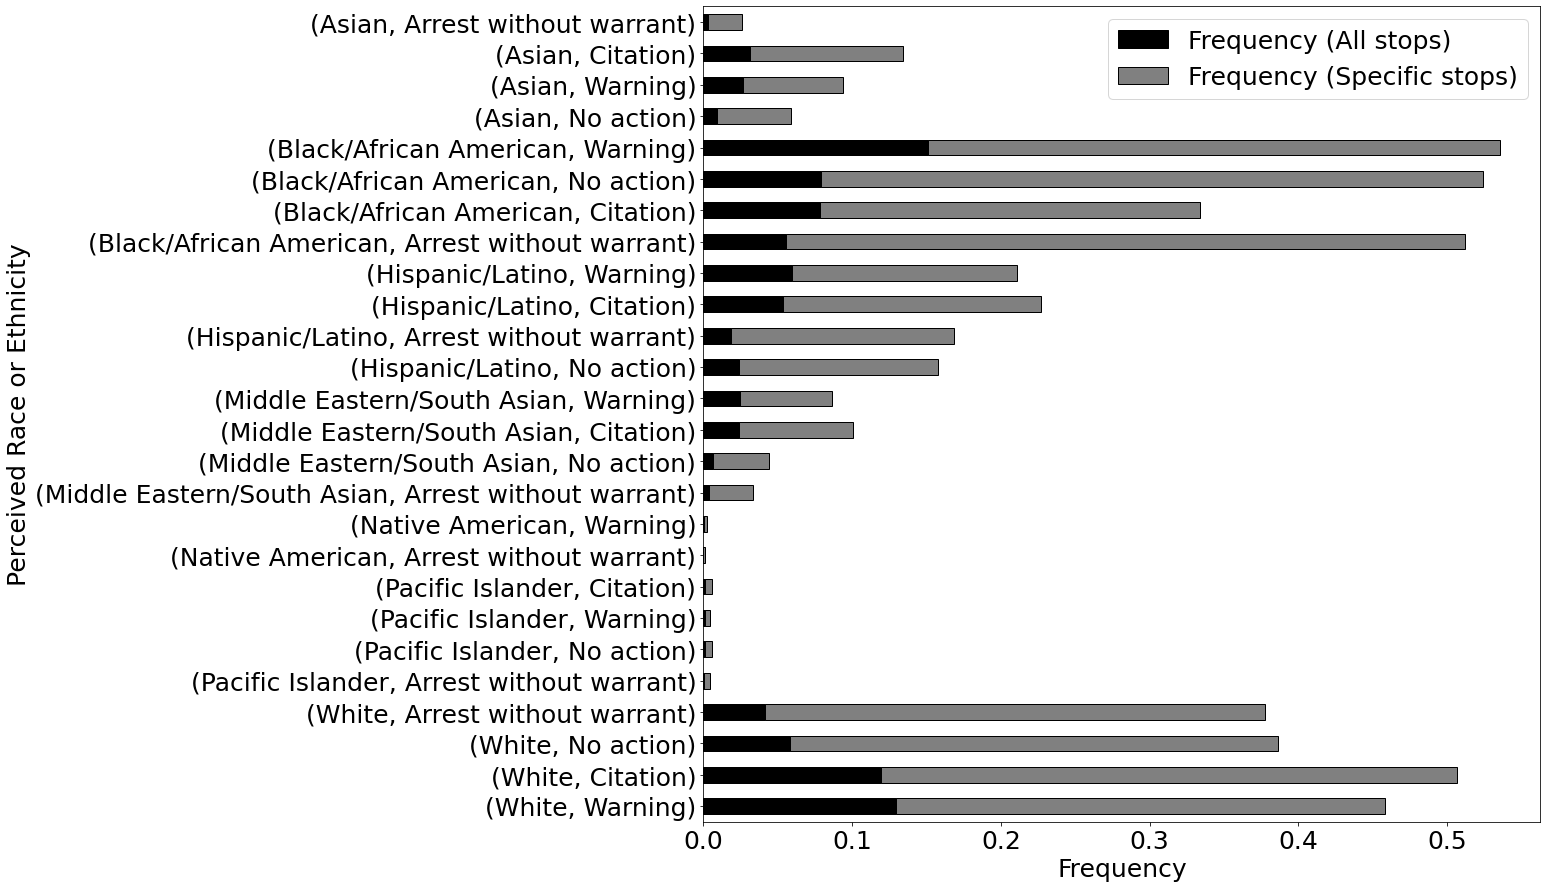

In [27]:
#Visualization of the data
df_frequencies_graph = df_frequencies.sort_values(by=[p_race], ascending=False)
df_frequencies_graph.plot.barh(stacked=True, color=['black', 'gray'], figsize=(15,15), fontsize=(25))

plt.xlabel('Frequency', fontsize=(25))
plt.ylabel(p_race, fontsize=(25))
plt.legend(loc=1, prop={'size':25})

# Conclusion


There is a lot of data in this dataset and there is a lot of conclusions that could be identified with this dataset, albeit not included in this notebook. I would love to look at the data and provide more insights into this data but this is what I'm capable of at the moment with the time given to me. I think going forward RIPA should include some form of racial identification in the datasets since it would provide concrete data to look at instead of the 'perceived' data that is provided by officers. Some things I would like to improve in this notebook: Providing more data and visualizations, color coding visualizations, improving functionality of the count dataframes, creating functions to make the notebook an interactable space rather than a visual space.

Closing note: I hope this notebook provides some insight into the police stop statistics of Berkeley, CA. I had a lot of fun learning the programming required to provide a simple data anylsis and visualization of the data and a lot of frustration and time spent to get here. I don't think this is a final product whatsoever, more of an alpha of what could be a well-designed and thorough project. 